# Explore Workbook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [35]:
df = pd.read_csv('sentiment.csv', index_col=False)
df.head()

,date,Unnamed: 0,file,message,content,sender,subject,clean,tokenize,stop_words,stemm,lemmatize,sentiment,year,month,day
0,1980-01-01 00:00:00+00:00,500017,whalley-g/notes_inbox/1.,Message-ID: <26478103.1075845469034.JavaMail.e...,Critical Migration Information:\n\n1. Your sch...,outlook.team@enron.com,3 - URGENT - TO PREVENT LOSS OF INFORMATION,critical migration information\n\n1 your sched...,critical migration information\n\n1 your sched...,critical migration information 1 scheduled out...,critic migrat inform 1 your schedul outlook mi...,critical migration information 1 your schedule...,0.6124,1980,1,1
1,1980-01-01 00:00:00+00:00,268334,lay-k/all_documents/21.,Message-ID: <6457299.1075840201254.JavaMail.ev...,Calling All Alumni!\n \nUniversity of Ho...,rosalee.fleming@enron.com,University of Houston Reception,calling all alumni\n \nuniversity of hou...,calling all alumni\n \nuniversity of houston u...,calling alumni university houston university h...,call all alumni univers of houston univers of ...,calling all alumnus university of houston univ...,0.0000,1980,1,1
2,1980-01-01 00:00:00+00:00,268229,lay-k/all_documents/119.,Message-ID: <3823157.1075840203657.JavaMail.ev...,Letter dictated by Ken Lay\n\n\n\nHello Janice...,tori.wells@enron.com,Re: Update from cousins in Missouri,letter dictated by ken lay\n\n\n\nhello janice...,letter dictated by ken lay\n\n\n\nhello janice...,letter dictated ken lay hello janice enjoyed r...,letter dictat by ken lay hello janic i enjoy y...,letter dictated by ken lay hello janice i enjo...,0.9979,1980,1,1
3,1980-01-01 00:00:00+00:00,268172,lay-k/all_documents/1088.,Message-ID: <3298981.1075840289876.JavaMail.ev...,Mr. Sikes -\n\nKenneth L. Lay is the Chairman ...,rosalee.fleming@enron.com,Re: Energy TF Final Report,mr sikes \n\nkenneth l lay is the chairman of ...,mr sikes \n\nkenneth l lay is the chairman of ...,mr sikes kenneth l lay chairman enron position...,mr sike kenneth l lay is the chairman of enron...,mr sikes kenneth l lay is the chairman of enro...,0.7964,1980,1,1
4,1980-01-01 00:00:00+00:00,306319,mann-k/all_documents/3450.,Message-ID: <31290580.1075845660660.JavaMail.e...,"Hi Brian,\n\nHere are my observations/question...",kay.mann@enron.com,"Re: BlueDog Change Order #2, Rev 4",hi brian\n\nhere are my observationsquestions\...,hi brian\n\nhere are my observationsquestions\...,hi brian observationsquestions david marshall ...,hi brian here are my observationsquest ha davi...,hi brian here are my observationsquestions ha ...,0.8126,1980,1,1


In [71]:
df.date = pd.to_datetime(df.date).sort_index()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517401 entries, 0 to 517400
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype              
---  ------      --------------   -----              
 0   date        517401 non-null  datetime64[ns, UTC]
 1   Unnamed: 0  517401 non-null  int64              
 2   file        517401 non-null  object             
 3   message     517401 non-null  object             
 4   content     517401 non-null  object             
 5   sender      517401 non-null  object             
 6   subject     498214 non-null  object             
 7   clean       517389 non-null  object             
 8   tokenize    517347 non-null  object             
 9   stop_words  517115 non-null  object             
 10  stemm       517347 non-null  object             
 11  lemmatize   517347 non-null  object             
 12  sentiment   517401 non-null  float64            
 13  year        517401 non-null  int64              
 14  month       517401 n

In [74]:
df = df.set_index('date')
df.index.dtype

datetime64[ns, UTC]

# Persons of Interest
- only has 205 rows

### Create list of email address of exexcutives and other Persons of Interest

In [3]:
# create list of persons of interest
poi_ls = ['kenneth.lay@enron.com',
       'ken.lay-@enron.com',
       'ken.lay@enron.com',
       'ken.lay-.chairman.of.the.board@enron.com',
       
      'jeff.skilling@enron.com',
       'jeffereyskilling@yahoo.com',
       
      'andrew.fastow@enron.com',
       
       'lfastow@pop.pdq.net',
       'lfastow@pdq.net',
       
      'jefferey.mcmahon@enron.com',
       'mcmahon@enron.com',
       'mcmahonm@kochind.com',
       'gmcmahon@btuwatch.com'
       
       
      'rick.causey@enron.com',
       
      'kenneth.rice@enron.com',
      'ken_rice@enron.net',
      'ken.rice@enron.com',
      '-persson@ricemail.ricefinancial.com']

In [4]:
# identify sender emails related to main poi
df[df.sender.str.contains('fastow')].sender.unique()

array(['lfastow@pop.pdq.net', 'lfastow@pdq.net',
       'andrew.fastow@enron.com'], dtype=object)

In [11]:
# test string search
df[df.sender.str.contains('-persson@ricemail.ricefinancial.com')].content.values

array(['\n     Barry:\n     \n     You probably thought I had forgotten about you! I had not. I wanted to \n     iron out some areas of concern from my end here. As you know, I am not \n     supposed to do an investment for you while you are a resident of the \n     US. I have discovered that if we put the money into an account and not \n     make moves on it until you move back to Canada, then we can do it if I \n     use a Canadian address. I was advised to put the money into a balanced \n     fund and leave it there for now. My thoughts are to move it to a \n     couple of funds in a self administered account and NOT make any moves \n     with it. \n     \n     Please review this note, and let me know what you think. If all is ok \n     I will mail you the forms to sign (which you signed here), and we will \n     get this moving.\n     \n     Hope all is well with you down there.\n     \n     Regards\n     Rob\n',
       '\n     Barry: I will send a note to Jacy. Also the funds I th

In [76]:
# create poi column for true or false vlaue
df['poi'] = np.where(df.sender.isin(poi_ls), True, False)
df.head()

,Unnamed: 0,file,message,content,sender,subject,clean,tokenize,stop_words,stemm,lemmatize,sentiment,year,month,day,poi
date,,,,,,,,,,,,,,,,
1980-01-01 00:00:00+00:00,500017,whalley-g/notes_inbox/1.,Message-ID: <26478103.1075845469034.JavaMail.e...,Critical Migration Information:\n\n1. Your sch...,outlook.team@enron.com,3 - URGENT - TO PREVENT LOSS OF INFORMATION,critical migration information\n\n1 your sched...,critical migration information\n\n1 your sched...,critical migration information 1 scheduled out...,critic migrat inform 1 your schedul outlook mi...,critical migration information 1 your schedule...,0.6124,1980,1,1,False
1980-01-01 00:00:00+00:00,268334,lay-k/all_documents/21.,Message-ID: <6457299.1075840201254.JavaMail.ev...,Calling All Alumni!\n \nUniversity of Ho...,rosalee.fleming@enron.com,University of Houston Reception,calling all alumni\n \nuniversity of hou...,calling all alumni\n \nuniversity of houston u...,calling alumni university houston university h...,call all alumni univers of houston univers of ...,calling all alumnus university of houston univ...,0.0000,1980,1,1,False
1980-01-01 00:00:00+00:00,268229,lay-k/all_documents/119.,Message-ID: <3823157.1075840203657.JavaMail.ev...,Letter dictated by Ken Lay\n\n\n\nHello Janice...,tori.wells@enron.com,Re: Update from cousins in Missouri,letter dictated by ken lay\n\n\n\nhello janice...,letter dictated by ken lay\n\n\n\nhello janice...,letter dictated ken lay hello janice enjoyed r...,letter dictat by ken lay hello janic i enjoy y...,letter dictated by ken lay hello janice i enjo...,0.9979,1980,1,1,False
1980-01-01 00:00:00+00:00,268172,lay-k/all_documents/1088.,Message-ID: <3298981.1075840289876.JavaMail.ev...,Mr. Sikes -\n\nKenneth L. Lay is the Chairman ...,rosalee.fleming@enron.com,Re: Energy TF Final Report,mr sikes \n\nkenneth l lay is the chairman of ...,mr sikes \n\nkenneth l lay is the chairman of ...,mr sikes kenneth l lay chairman enron position...,mr sike kenneth l lay is the chairman of enron...,mr sikes kenneth l lay is the chairman of enro...,0.7964,1980,1,1,False
1980-01-01 00:00:00+00:00,306319,mann-k/all_documents/3450.,Message-ID: <31290580.1075845660660.JavaMail.e...,"Hi Brian,\n\nHere are my observations/question...",kay.mann@enron.com,"Re: BlueDog Change Order #2, Rev 4",hi brian\n\nhere are my observationsquestions\...,hi brian\n\nhere are my observationsquestions\...,hi brian observationsquestions david marshall ...,hi brian here are my observationsquest ha davi...,hi brian here are my observationsquestions ha ...,0.8126,1980,1,1,False


In [77]:
# create dataframe for poi
poi = df[df.poi == True]
poi.head()

,Unnamed: 0,file,message,content,sender,subject,clean,tokenize,stop_words,stemm,lemmatize,sentiment,year,month,day,poi
date,,,,,,,,,,,,,,,,
2000-01-27 12:37:00+00:00,443393,skilling-j/all_documents/57.,Message-ID: <14512731.1075840067407.JavaMail.e...,THE COUNTDOWN IS ON! \n\nThe Associate & Analy...,jeff.skilling@enron.com,A/A Website,the countdown is on \n\nthe associate analyst...,the countdown is on \n\nthe associate analyst ...,countdown associate analyst website waiting al...,the countdown is on the associ analyst websit ...,the countdown is on the associate analyst webs...,0.9763,2000,1,27,True
2000-01-27 12:37:00+00:00,442363,skilling-j/_sent_mail/127.,Message-ID: <24345503.1075840107104.JavaMail.e...,THE COUNTDOWN IS ON! \n\nThe Associate & Analy...,jeff.skilling@enron.com,A/A Website,the countdown is on \n\nthe associate analyst...,the countdown is on \n\nthe associate analyst ...,countdown associate analyst website waiting al...,the countdown is on the associ analyst websit ...,the countdown is on the associate analyst webs...,0.9763,2000,1,27,True
2000-01-27 12:37:00+00:00,444526,skilling-j/discussion_threads/50.,Message-ID: <12028181.1075840083069.JavaMail.e...,THE COUNTDOWN IS ON! \n\nThe Associate & Analy...,jeff.skilling@enron.com,A/A Website,the countdown is on \n\nthe associate analyst...,the countdown is on \n\nthe associate analyst ...,countdown associate analyst website waiting al...,the countdown is on the associ analyst websit ...,the countdown is on the associate analyst webs...,0.9763,2000,1,27,True
2000-01-27 12:37:00+00:00,408721,scott-s/msap_info/18.,Message-ID: <32894133.1075846790404.JavaMail.e...,THE COUNTDOWN IS ON! \n\nThe Associate & Analy...,jeff.skilling@enron.com,A/A Website,the countdown is on \n\nthe associate analyst...,the countdown is on \n\nthe associate analyst ...,countdown associate analyst website waiting al...,the countdown is on the associ analyst websit ...,the countdown is on the associate analyst webs...,0.9763,2000,1,27,True
2000-01-27 12:37:00+00:00,407747,scott-s/discussion_threads/802.,Message-ID: <4766055.1075846768297.JavaMail.ev...,THE COUNTDOWN IS ON! \n\nThe Associate & Analy...,jeff.skilling@enron.com,A/A Website,the countdown is on \n\nthe associate analyst...,the countdown is on \n\nthe associate analyst ...,countdown associate analyst website waiting al...,the countdown is on the associ analyst websit ...,the countdown is on the associate analyst webs...,0.9763,2000,1,27,True


In [78]:
poi.index.dtype

datetime64[ns, UTC]

In [79]:
poi.isna().sum()

Unnamed: 0    0
file          0
message       0
content       0
sender        0
subject       4
clean         0
tokenize      0
stop_words    0
stemm         0
lemmatize     0
sentiment     0
year          0
month         0
day           0
poi           0
dtype: int64

# Time Series

In [19]:
from datetime import timedelta, datetime

## All Time Series

In [81]:
ts = df[['sentiment']]

<AxesSubplot:xlabel='date'>

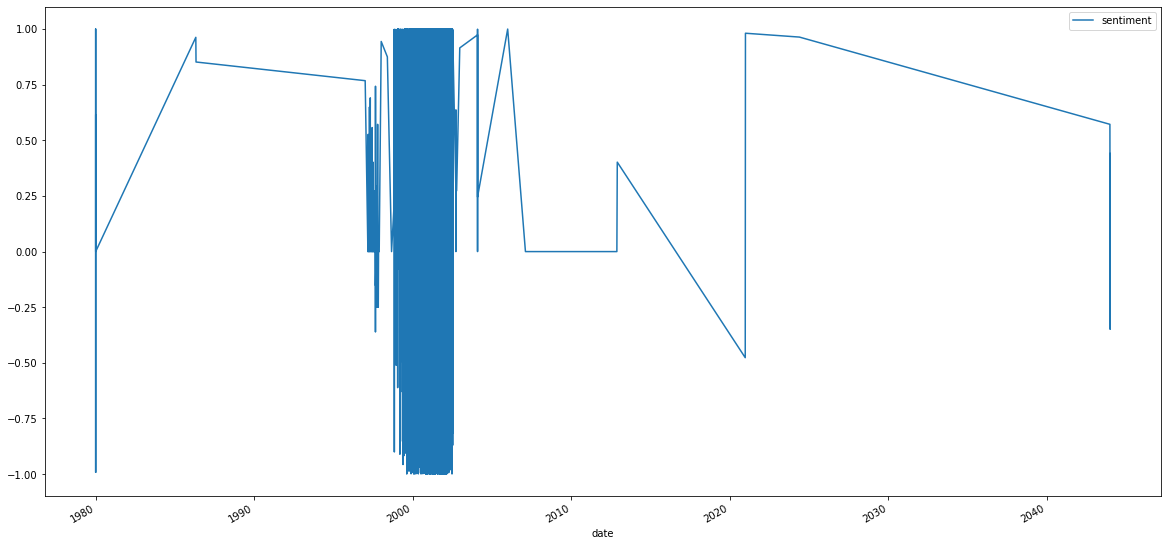

In [82]:
# plot all sentiment over time
ts.plot(figsize=(20,10))

# POI Time Series

<AxesSubplot:xlabel='date'>

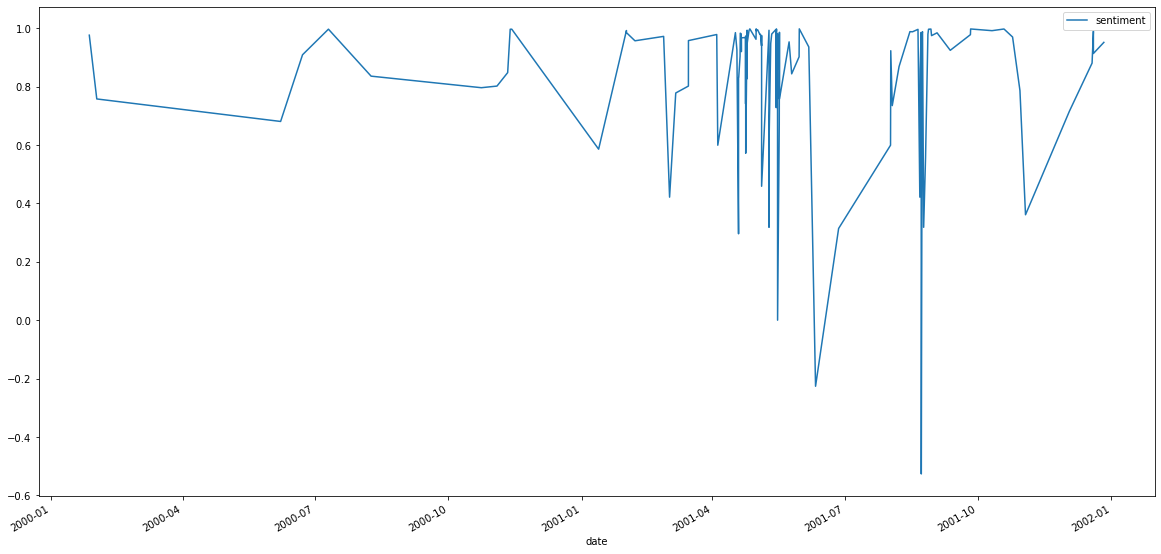

In [83]:
# plot seniment for POI
poi[['sentiment']].plot(figsize=(20,10))